# **PROJETO BIG FIVE PERSONALITY TEST**

# 1.1 Referencias Utilizadas

>Este projeto foi sugerido pelo Felipe Santana do canal no youtube Stack


1.   [Canal Stack - Link de Acesso](https://www.youtube.com/c/Stack_tecnologias)



> Este projeto é um estudo do campo de aprendizado de máquina não supervisionado (Supervised Machine Learnig) que utilizará uma base de dados disponibilizada no KAGGLE.

*   [Big Five Personality Test](https://www.kaggle.com/datasets/tunguz/big-five-personality-test/)




# 1.1 Descrição da Base de Dados

A base de dados é composta por 1.013.558 dados coletados através de uma pesquisa online realizada entre 2016 e 2018, que visa mapear a personalidade do entrevistado através de 50 peguntas distribuidas nos 5 marcadores abaixo:

*   **[EXT]** Extraversion (Extroversão)
*   **[EST]** Emotional Stability (Estabilidade Emocional)
*   **[AGR]** Agreeableness (Simpatia)
*   **[CSN]** Conscientiousness (Conscienciosidade)
*   **[OPN]** Imagination or openness to experience (Imaginação ou Abertura à Experiencia ) 

Existem 10 sentenças para cada um dos 5 marcadores de personalidade, que podem ser classificadas de 1 a 5, sendo 


*   **[1]** Corresponde a reposta de maior **DISCORDANCIA**,
*   **[3]** Corresponde a resposta de maior **NEUTRALIDADE**
*   **[5]** Corresponde a reposta de maior **CONCORDANCIA**






  

# 1.2 Tratamento dos Dados


In [1]:
import numpy as np 
import pandas as pd

>A base de dados "data-final.csv" foi carrega no COLAB e possuiu um separador do tipo /t. Para o estudo em questão utilizaremos apenas as colunas referentes as 50 perguntas do teste de peronalidade, e portanto as demais colunas serão excluídas da base de dados

In [3]:
dados = pd.read_csv('data-final.csv', engine = "python", sep = "\t")
dados.drop(dados.columns[50:110], axis=1, inplace=True)

In [4]:
pd.options.display.float_format = "{:.2f}".format
shape = dados.shape
print(shape)
dados.describe()


(1015341, 50)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,...,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,...,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,...,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,...,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,...,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,...,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


> Através da propriedade ".shape" do DataFrame Pandas é possível verificar que os processos de importação, separação e remoção das colunas ocorreram de forma correta, uma vez que a base de dados possui 1.013.558 dados dispostos em 50 colunas, conforme esperado

> Já a análise do método ".describe()" do DataFrame Pandas indica a presença de linhas com valor zerado, uma vez que a medida "min" para todas as colunas é igual a "0". As colunas do teste devem possuir por definição apenas valores de "1" a "5", o que torna necessário o processo de exclusão das linhas com valor "0".

In [6]:
dados = dados[(dados > 0.00).all(axis=1)]
dados.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,...,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00
mean,2.65,2.80,3.30,3.17,3.30,2.41,2.78,3.44,2.98,3.59,...,3.70,2.07,4.04,2.00,3.82,1.90,4.02,3.22,4.17,3.98
std,1.25,1.31,1.19,1.21,1.24,1.21,1.38,1.24,1.33,1.27,...,1.10,1.10,1.04,1.07,0.93,1.08,0.94,1.22,0.97,0.99
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,...,3.00,1.00,3.00,1.00,3.00,1.00,4.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,...,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,...,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


# 1.3 Escolha do Classificador

> Dentre as diversas opções disponpiveis na secção de "Clusterings" do Scikit-Learn, foi definido para este projeto a utilização do "Classificador" **KMeans**, que é o mais popular entre os classificadores disponíveis e possui apenas um paparametro de entrada, isto é, o número de "clusters" desejados

In [7]:
from sklearn.cluster import KMeans

> O classificador KMeans é normalmente utilizado para um pequeno ou médio número de clusters, porém em quantos "clusters" exatamente devemos classificar a base de dados deste projeto ? Cada "Cluster" representará um traço de personalidade distinto, e portanto, sabemos que por definição o número de clusters deverá ser igual a 5.

> Mas e se tivessemos um caso onde o número de clusters desejados não estivesse exatamente definido? Neste caso poderiamos utilizar algumas ferramentas que indicam o número ideal de clusters com base na distinção entre os dados da base de dados, como por exemplo o Silhouette Score do prório Scikit-Learn ou o KElbowVisualizer da biblioteca YellowBrick

> Por se tratar de uma DataFrame de muitas linhas (874.434 após a remoção dos valores zerados), será necessário realizar o estudo de otimização do número de clusters através de uma amostra do total de dados, uma vez que os métodos Silhouette Score e KElbowVisualizer possuem um custo processual muito alto.

In [25]:
dados_amostra = dados.sample(frac=0.1,random_state=200)
dados_amostra.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,87443.00,87443.00,87443.00,87443.00,87443.00,87443.00,87443.00,87443.00,87443.00,87443.00,...,87443.00,87443.00,87443.00,87443.00,87443.00,87443.00,87443.00,87443.00,87443.00,87443.00
mean,2.64,2.80,3.30,3.17,3.30,2.41,2.78,3.44,2.98,3.58,...,3.70,2.07,4.04,2.00,3.82,1.90,4.02,3.22,4.17,3.98
std,1.25,1.31,1.19,1.21,1.24,1.21,1.38,1.25,1.33,1.28,...,1.10,1.09,1.04,1.07,0.94,1.08,0.93,1.22,0.97,0.99
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,...,3.00,1.00,3.00,1.00,3.00,1.00,4.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,...,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,...,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


> Mesmo com 10% dos dados totais, o DataFrame de amostras ainda possui um valor consideravelmente grande de dados (87.443)

# 1.3.1 Otimização do Número de Cluster por Silhouette Score

> Utilizaremos a métrica Silhouette Score do Scikit-Learn para obter uma medida que representa a consistência do agrupamento realizado pelo KMeans. Para identificar a quantidade ideal de "clusters", treinaremos o modelo com todas as possibilidades de 2 a 10 clusters e selecionaremos aquele que obtiver o maior Silhouette Score.

In [26]:
from sklearn.metrics import silhouette_score
import time

> Definiremos a funçaõ Temporizador_Silhouette_Score para averiguarmos o tempo de processamento do Silhouette Score, de forma a avaliar a viabilidade de execução deste processo neste tamanho de amostra, uma vez que o mesmo rodará 9 vezes (Número de Clusters de 2 a 10)

In [32]:
def Temporizador_Silhouette_Score(data):
  classificador = KMeans(n_clusters = 2)
  labels = classificador.fit_predict(data)
  tic = time.time()
  media_silhueta = silhouette_score(data, labels)
  tac = time.time()
  tempo_duracao = tac - tic
  print("O Silhouette Score utilizando 2 Clusters foi de : %.2f"%(media_silhueta))
  print("O Tempo de Processamento do Silhouette Score doi de %.2f Minutos"%(tempo_duracao/60))

In [33]:
Temporizador_Silhouette_Score(dados_amostra)

O Silhouette Score utilizando 2 Clusters foi de : 0.10
O Tempo de Processamento do Silhouette Score doi de 1.82 Minutos


> Para um DataFrame de amostra com 10% do tamanho do DataFrame original, tem-se um custo processual de 1,8 minutos para cada variação do número de cluster. Logo, o processo de varredura de todos os números de clusters (de 2 a 10 clusters) levará 16,2 Minutos para ser concluído.

In [39]:
def best_number_clusters (data,max_cluster):
  for cluster in range(2, max_cluster+1):
    classificador = KMeans(n_clusters=cluster)
    labels = classificador.fit_predict(data)
    tic = time.time()
    media_silhueta = silhouette_score(data, labels)
    tac = time.time()
    tempo_duracao = tac - tic
    print("O Silhouette Score utilizando %d Clusters foi de : %.2f, com um Tempo de Processamento de %.2f Minutos"%(cluster, media_silhueta,(tempo_duracao/60)))
    scores.append(media_silhueta)

In [42]:
scores = []
best_number_clusters(dados_amostra,10)

O Silhouette Score utilizando 2 Clusters foi de : 0.10, com um Tempo de Processamento de 1.88 Minutos
O Silhouette Score utilizando 3 Clusters foi de : 0.07, com um Tempo de Processamento de 1.77 Minutos
O Silhouette Score utilizando 4 Clusters foi de : 0.07, com um Tempo de Processamento de 1.68 Minutos
O Silhouette Score utilizando 5 Clusters foi de : 0.06, com um Tempo de Processamento de 1.67 Minutos
O Silhouette Score utilizando 6 Clusters foi de : 0.06, com um Tempo de Processamento de 1.65 Minutos
O Silhouette Score utilizando 7 Clusters foi de : 0.05, com um Tempo de Processamento de 1.62 Minutos
O Silhouette Score utilizando 8 Clusters foi de : 0.05, com um Tempo de Processamento de 1.60 Minutos
O Silhouette Score utilizando 9 Clusters foi de : 0.05, com um Tempo de Processamento de 1.64 Minutos
O Silhouette Score utilizando 10 Clusters foi de : 0.04, com um Tempo de Processamento de 1.68 Minutos


> com os dados dos testes armazenados na variável "scores", torna-se possível a plotagem de um gráfico comparativo.

In [50]:
import plotly.graph_objects as go

def grafico_comparacao_silhouette_Score(scores):
  faixa_de_clusters = [i for i in range(2, len(scores)+2)]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x = faixa_de_clusters,  y = scores))
  fig.update_layout(title = "Valores de Silhuenta Medios", xaxis_title = "Numero de Clusters", yaxis_title = "Valor Média de Silhueta")
  fig.show()

In [51]:
grafico_comparacao_silhouette_Score(scores)

> Avaliando-se o gráfico, tem-se que o Silhouette Score indica 2 Clusters como sendo a quantidade ideal para utilização do KMeans neste DataSet, o que vai contra o que esperávamos (5 Clusters). Entretanto, mesmo com 2 clusters, o Silhouette Score apresentou um resultado mais próximo de "0" do que de "1", o que indica que os clusters estão sobrepostos

# 1.3.2 Otimização do Número de Cluster por KElbowVisualizer

> Utilizaremos também a métrica KElbowVisualizer do YellowBrick para obter tambem uma medida que representa a consistência do agrupamento realizado pelo KMeans. Para identificar a quantidade ideal de "clusters", treinaremos o modelo com todas as possibilidades de 2 a 10 clusters e selecionaremos aquele que obtiver o maior Silhouette Score. Essa varredura já é realizada pelo KElbowVisualizer, não necessitando da criação de uma função com uma estutura de repetição.

In [52]:
from yellowbrick.cluster import KElbowVisualizer

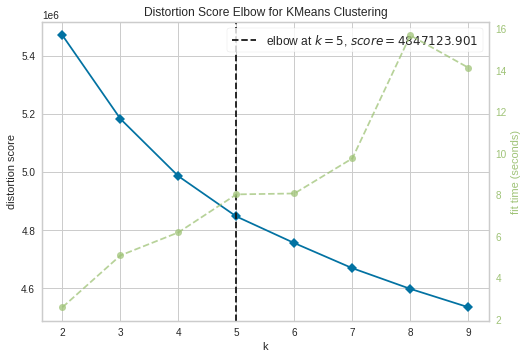

In [53]:
classificador = KMeans()
visualizador = KElbowVisualizer(classificador, k=(2,10))
visualizador.fit(dados_amostra)
visualizador.poof()

> Pela abordagem do KElbowVisualizer, nota-se que "5" é o número ideal de clusters a ser utilizado no KMeans para treinamento do modelo. Esse resultado bate com o esperado, uma vez que de fato existem 5 traços de personalidade

# 1.4 Treinando o Classificador Final

> Para o treinamento do classificador final não será necessário a utilização do DataFrame de Amostra, uma vez que o custo precessual de treinamento não é muito alto.Sendo assim, utilizaremos o DataFrame "Dados"

In [55]:
modelo = KMeans(n_clusters = 5)
classificador = modelo.fit(dados)

> Com a classificador treinado com todos os dados, vamos inserir suas predições, isto é, suas classificações no DataFrame original

In [56]:
predicoes = classificador.labels_
dados["Classificação"] = predicoes

In [57]:
dados.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Classificação
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,...,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,1
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,...,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,3
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,...,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,3
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,...,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,2
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,...,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,1


# 1.5 Criando uma Interface de Classificação

> O classificador do projeto já se encontra treinado com os dados originais, estando apto à realizar classificações através do método ".predict(). Ese método deve receber como argumanto uma lista de 50 números inteiros variando de 1 a 5, representando as respostas para as 50 perguntas do teste de personalidade.
> Para facilitar o processo de coleta e armazenamento dessa lista por parte do usuário final, criaremos uma interface através da biblioteca gradio

In [ ]:
!pip install gradio

In [69]:
import gradio as gr
Dicionario_de_Perguntas = pd.read_csv('Dicionario_de_Perguntas.csv', sep = ";")

In [89]:
perguntas = Dicionario_de_Perguntas["PERGUNTA"]

In [ ]:
respostas = []
for q in perguntas:
  obj_input = gr.inputs.Slider(minimum=1,maximum=5,step=1,default=3,label=q)
  respostas.append(obj_input)

In [100]:
def predict(*saidas):
    saidas = np.array(saidas).reshape(1, -1)
    return classificador.predict(saidas)

iface = gr.Interface(
                    fn = predict,
                    title = "Big Five Personality",
                    description = "Sistema para detecção de traços de personalidade.",
                    inputs = respostas,
                    outputs="text")
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://57298.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f870fd27650>,
 'http://127.0.0.1:7864/',
 'https://57298.gradio.app')

Exception in callback None(<Task finishe...> result=None>)
handle: <Handle>
Traceback (most recent call last):
  File "/usr/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
TypeError: 'NoneType' object is not callable
